In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import math

**Q1**

In [84]:
heights_data = pd.read_csv('../statsics_course_data_files/heights.csv')
heights_data.head(10)
X = heights_data.loc[:, 'HEIGHT'].values
Y = heights_data.loc[:, 'WEIGHT'].values

**A**

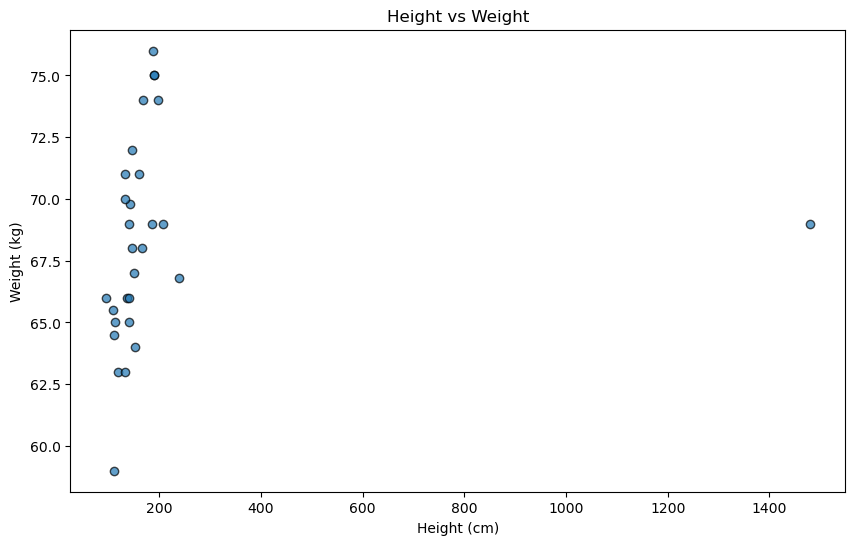

In [85]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.7, edgecolors='k')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight')
plt.show()

**B**

In [86]:
def robust_linear_regression(X, Y):
    Y_h = Y[math.ceil(len(X) * 2 / 3):]
    Y_l = Y[:math.ceil(len(X) * 1 / 3)]

    b = (np.median(Y_h) - np.median(Y_l)) / (X[math.ceil(len(X) * 5 / 6)] - X[math.ceil(len(X) * 1 / 6)])
    a = np.median(Y - b * X)

    return b, a
robust_linear_regression(X, Y)

(0.08333333333333333, 55.66666666666667)

In [87]:
def least_squares_regression(X, Y):
        X_mean = np.mean(X)
        Y_mean = np.mean(Y)

        # Calculate the slope (b) and intercept (a) using least squares method
        b = (np.sum((X - X_mean) * (Y - Y_mean))) / (np.sum((X - X_mean)**2))
        a = Y_mean - b * X_mean

        return b, a
least_squares_regression(X, Y)

(0.0018456444858739314, 67.93289611750745)

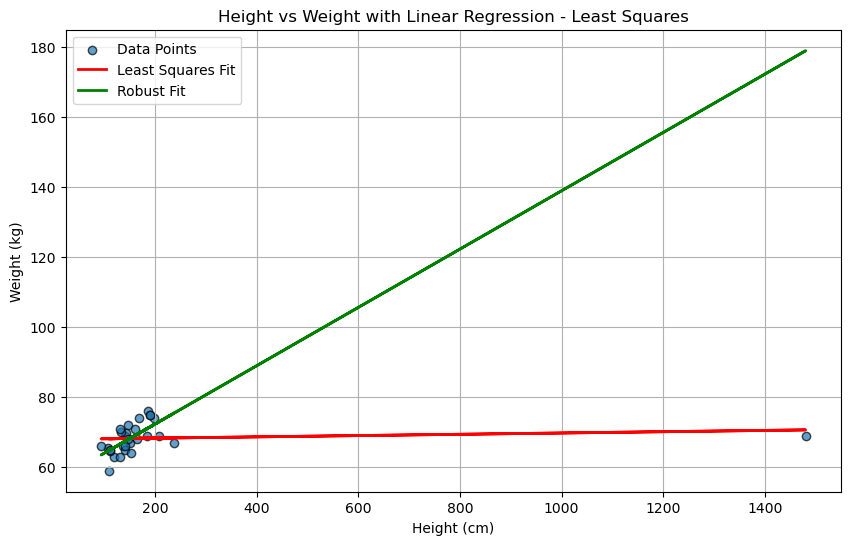

In [88]:
plt.figure(figsize=(10, 6))
b, a = least_squares_regression(X, Y)
c, d = robust_linear_regression(X, Y)
plt.scatter(X, Y, alpha=0.7, edgecolors='k')
plt.plot(X, b * X + a, color='red', linewidth=2)
plt.plot(X, c * X + d, color='green', linewidth=2)
plt.legend(['Data Points', 'Least Squares Fit', 'Robust Fit'])
plt.grid()
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight with Linear Regression - Least Squares')
plt.show()

**D**

In [97]:
def variance(X):
    return np.sum((X - np.mean(X))**2) // len(X)

def covariance(X, Y):
    return np.sum((X - np.mean(X)) * (Y - np.mean(Y))) // len(X)

def correlation(X, Y):
    return covariance(X, Y) / math.sqrt(variance(X) * variance(Y))

def R2(X, Y):
    b, a = least_squares_regression(X, Y)
    return (1 - np.sum((Y - (b * X + a))**2) / np.sum((Y - np.mean(Y))**2))

In [98]:
b, a = least_squares_regression(X, Y)
print('slope:', b)
print('correlation:', correlation(X, Y))
print('correlation calculated using linear regression slope:', b * math.sqrt(variance(X) / variance(Y)))
print('R2:', R2(X, Y))
print('R2 calculated with r^2:', correlation(X, Y)**2)

slope: 0.0018456444858739314
correlation: 0.11238259365351524
correlation calculated using linear regression slope: 0.11290721657042288
R2: 0.012462584907215302
R2 calculated with r^2: 0.012629847356291125


**E**

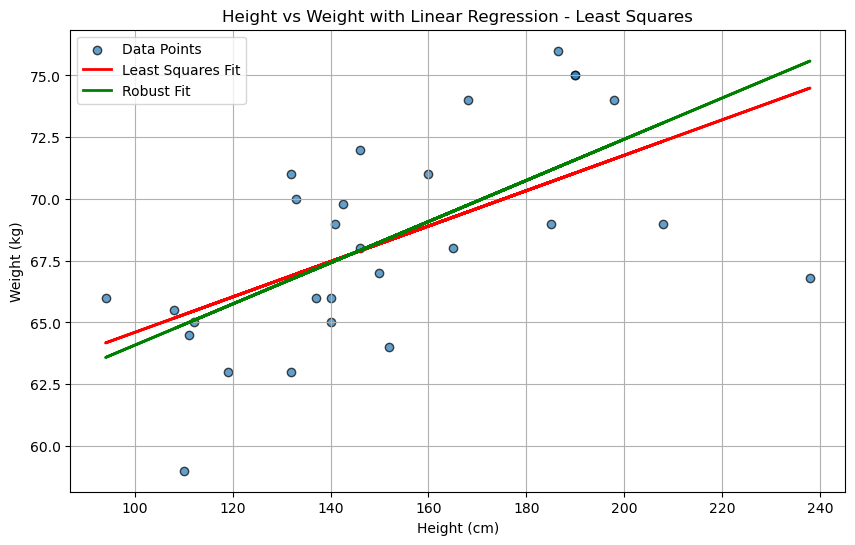

slope: 0.07165444334473373
correlation: 0.6021347963681782
correlation calculated using linear regression slope: 0.6024408847000247
R2: 0.3430963686128905
R2 calculated with r^2: 0.3625663129973475


In [106]:
# Remove the outlier
new_Y = np.delete(Y, np.argmax(X))
new_X = np.delete(X, np.argmax(X))

# second time B
plt.figure(figsize=(10, 6))
b, a = least_squares_regression(new_X, new_Y)
c, d = robust_linear_regression(new_X, new_Y)
plt.scatter(new_X, new_Y, alpha=0.7, edgecolors='k')
plt.plot(new_X, b * new_X + a, color='red', linewidth=2)
plt.plot(new_X, c * new_X + d, color='green', linewidth=2)
plt.legend(['Data Points', 'Least Squares Fit', 'Robust Fit'])
plt.grid()
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight with Linear Regression - Least Squares')
plt.show()

# second time D
print('slope:', b)
print('correlation:', correlation(new_X, new_Y))
print('correlation calculated using linear regression slope:', b * math.sqrt(variance(new_X) / variance(new_Y)))
print('R2:', R2(new_X, new_Y))
print('R2 calculated with r^2:', correlation(new_X, new_Y)**2)


**Q2**